# Exercise 11: The beauty of kNN

In this exercise, you'll gain practice working with kNN. We'll use the [diamonds](https://ggplot2.tidyverse.org/reference/diamonds.html) dataset, which comes as part of `ggplot2`. This dataset provides information on the quality and price of 50,000 diamonds


1. data plotting and train/test sets 2/2
2. knn 3/3
3. for loop 3/3
4. standardizing predictors 2/2


## 1. Data, Plotting, and Train/Test Sets (2 pts)
-----
* Load the the `class` and `tidyverse` packages.
* Assign the `diamonds` data set to a simpler name. Then, create a new variable `price_bin` that splits the `price` variable into a binary variable, where 1 indicates that the diamond costs greater than the mean price, and 0 indicates that the diamond costs less than the mean price. Set `price_bin` to be a factor. (*Hint: use the if_else() function*)
* Select just the `carat`, `depth`, `table`, `x`, `y`, and your new `price_bin` variables
* Print the first few lines of the data set
* Print the dimensions of the data set


In [ ]:
library(tidyverse)
library(ggplot2)
data(diamonds)
library(class)
diam <- diamonds
diam <- diam %>%
mutate(price_bin = if_else(price>mean(price), 1,0)) %>%
mutate(price_bin = as.factor(price_bin))
diam_select <- diam %>%
select(carat, depth, table, x, y, price_bin)
head(diam_select)
dim(diam_select)


carat,depth,table,x,y,price_bin
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.23,61.5,55,3.95,3.98,0
0.21,59.8,61,3.89,3.84,0
0.23,56.9,65,4.05,4.07,0
0.29,62.4,58,4.20,4.23,0
0.31,63.3,58,4.34,4.35,0
0.24,62.8,57,3.94,3.96,0


[1] 53940     6

### Plot
Create a scatterplot of the link between `carat` and `depth`, and use the `color` aesthetics mapping to differentiate between diamonds that cost above versus below the mean price.

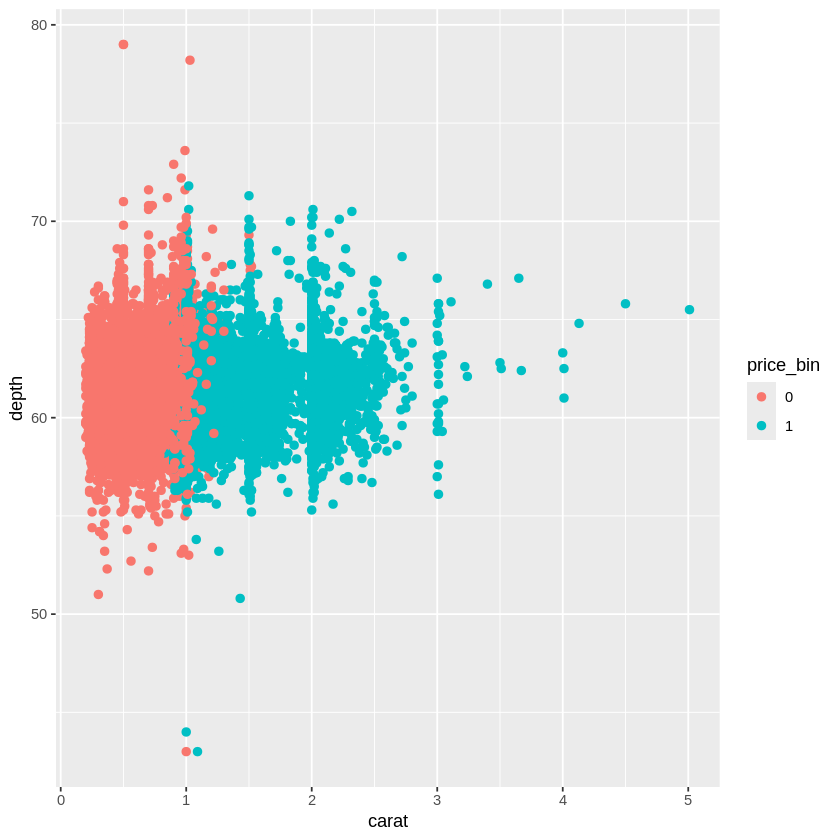

In [ ]:
ggplot(diam,aes(x= carat,y= depth,col= price_bin)) +
    geom_point(size=2)


Based on the above scatterplot, how do you think kNN will perform using only these two variables to predict diabetes diagnosis? Which variable, carat or depth, gives us the most information about which price class the diamond will belong to?

*   Based on the scatterplot kNN is likely to perform at a medium level of accuracy.
*   Carat is the feature that gives more information about which price class the diamond will have.






### Test vs Train

Before we run KNN on these data, we need to set aside a portion of the observations as our test set. Below, randomly divide the data such that 30% are allotted to the `test` set and the rest are allotted to the `train` set. Print the first few lines of each set, and print the dimensions of each set to double check your division of the data.

In [ ]:
set.seed(2023)
partition <- sample (1:nrow(diam), 0.3 * nrow(diam))
test<- diam[partition,]
train<- diam[-partition,]

head(test)
head(train)
dim(test)
dim(train)


carat,cut,color,clarity,depth,table,price,x,y,z,price_bin
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>
1.22,Ideal,G,VVS2,62.3,56.0,10038,6.81,6.84,4.25,1
1.57,Ideal,G,VVS2,62.3,56.0,15144,7.48,7.41,4.64,1
1.11,Very Good,J,SI1,62.4,57.7,4316,6.57,6.64,4.12,1
0.42,Ideal,F,VVS2,60.6,57.0,1142,4.82,4.85,2.93,0
0.32,Ideal,D,SI1,62.6,55.0,756,4.39,4.36,2.74,0
0.90,Premium,G,VS1,62.7,58.0,4661,6.06,6.15,3.83,1


carat,cut,color,clarity,depth,table,price,x,y,z,price_bin
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43,0
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31,0
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63,0
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75,0
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48,0
0.24,Very Good,I,VVS1,62.3,57,336,3.95,3.98,2.47,0


[1] 16182    11

[1] 37758    11

## 2: KNN (3 points)
----
Now, use the `knn()` function from the `class` library to predict `price_bin` from the `carat` and `depth`. Set `k = 3`.

*Hint: Review the format required for the arguments of knn()*

In [ ]:
set.seed(2023)
train_p <-cbind(train$carat, train$depth)
train_s <- train$price_bin
test_p <- cbind(test$carat, test$depth)
test_s_knn <- knn(train_p, test_p, train_s, k=3)

test_s_knn[1:10]



[1] 1 1 1 0 0 1 1 0 0 0
Levels: 0 1

Now, output a confusion matrix and calculate the test error to evaluate model performance.

In [ ]:
confusion_df <- data.frame(predicted = test_s_knn,actual = test$price_bin)
table(confusion_df)
print("---")
print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))
error_rate <- mean(confusion_df$predicted != confusion_df$actual)
cat("Error Rate:", error_rate,"\n")


         actual
predicted    0    1
        0 9707  316
        1  539 5620

[1] "---"
[1] "Accuracy: 0.947163515016685"
Error Rate: 0.05283648 


How did your model perform?
> This is a good model because predicts 94.72% de price of the diamonds in the test set and the error rate is 5.28% just considering carat and depth as predictors.
>



Let's try to improve our model by adding all of the other variables in our data set as predictors. Rerun your `knn()` below, keeping `k = 3`. Again, output a confusion matrix and error rate for your updated model fit.

In [ ]:
train_p2 <- train %>% select (-price_bin)
test_p2 <- test %>% select (-price_bin)

train_p2 <- as.data.frame(lapply(train_p2, function(x) if(is.factor(x)|| is.ordered(x))as.numeric(x) else x))
test_p2 <- as.data.frame(lapply(test_p2, function(x) if(is.factor(x)|| is.ordered(x))as.numeric(x) else x))

train_s2 <- as.factor(train$price_bin)
test_s_knn2 <- knn(train_p2, test_p2, train_s2, k=3)

confusion_df2 <- data.frame(predicted = test_s_knn2,actual = as.factor(test$price_bin))
conf_matrix2 <- table(confusion_df2$actual, confusion_df2$predicted)
error_rate2 <- mean(confusion_df2$predicted != confusion_df2$actual)
print(conf_matrix2)
print(paste("Accuracy:",mean(confusion_df2$predicted == confusion_df2$actual)))
cat("Error Rate:", error_rate2,"\n")


   
        0     1
  0 10246     0
  1     2  5934
[1] "Accuracy: 0.99987640588308"
Error Rate: 0.0001235941 


Did your model predictions improve?
> Yes, the model improved substantially by adding the rest of variables and the accuracy level is now 99.99% and error just 0.01%.

# 3: for loop (3 points)
----

So adding additional predictors didn't shift our error much. Let's see if adjusting `k` has a larger impact on model accuracy.

Using your initial model above with just `carat` and `depth`, run a `for loop` that runs the same model 30 times, for `k = 1:30`.

Output a data frame that has `k` and the overall `error` as columns.

The structure of the output data frame and `for loop` are provided for you below. Note that your loop will take a minute or two to run because there are so many observations in the dataset. It may be helpful while you are writing and testing your loop to run it on a subset of the data with only a handful of rows.

In [ ]:
# this is provided
# setting up empty table to store for loop output
output  <- data.frame(k = seq(1:30),
                     error = rep(NA, 30))
head(output)

,k,error
,<int>,<lgl>
1,1,NA
2,2,NA
3,3,NA
4,4,NA
5,5,NA
6,6,NA


In [ ]:
for (k in seq(1:30)) {
    knn_fits  <- knn(train_p, test_p, train_s, k=k)

    #overall error
    conf_df3  <- data.frame(predicted = knn_fits, actual = as.factor(test$price_bin))
    error_rate3 <- mean(conf_df3$predicted != conf_df3$actual)
    output$error[k] <-  error_rate3

}
head(output)

,k,error
,<int>,<dbl>
1,1,0.05333086
2,2,0.05302188
3,3,0.05382524
4,4,0.05345446
5,5,0.05234211
6,6,0.05271289


Create a line plot of your `output` object using `ggplot`. Add a (non-linear) `geom_smooth` layer.

`geom_smooth()` using formula = 'y ~ x'


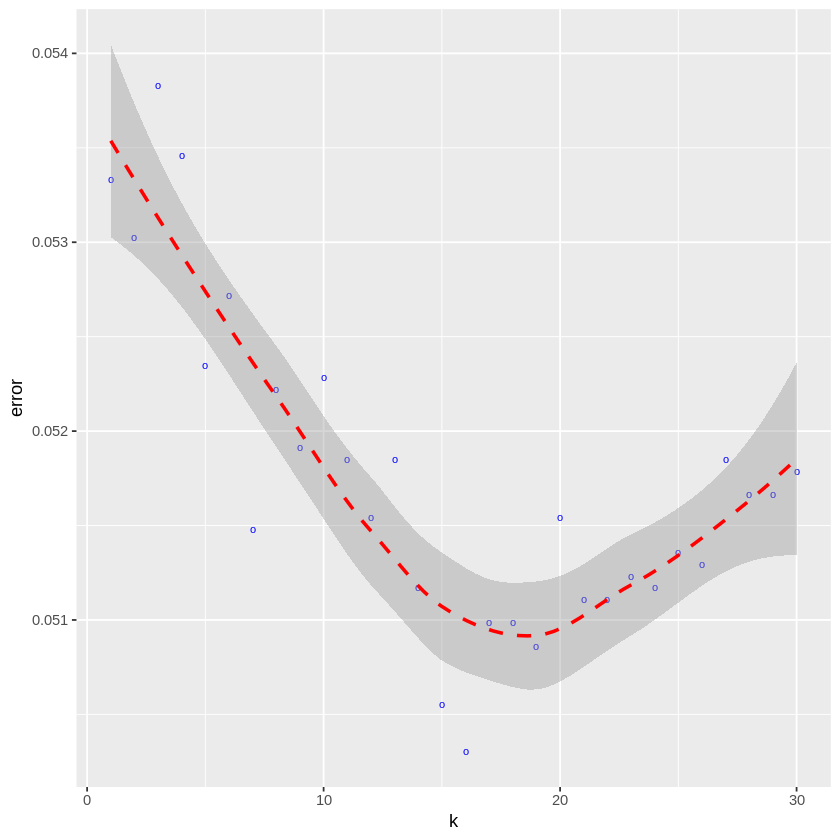

In [ ]:
ggplot(output, aes (x=k, y = error)) +
geom_point(size= 2, shape = "o", color = "blue") +
geom_smooth(method = "loess", color="red", linetype="dashed", size=1)

Interpret your plot. What would you select as the best value of `k`? How much does this improve your test error?
> I would select as the best value of 'k' 17 (aroud 15-20). We can observe a small but meaningful improvement in test error while using optimal k.


# 4: Standardizing predictors (2)
-----

Because knn is based on distances between points, it is very sensitive to the scale of your variables. Looking at our predictor variables, we can see that `carat` and `depth` are orders of magnitude different in terms of scales. Maybe we can improve our fit even more by addressing this!

Below, use the `scale()` function to standardize your predictors. (Note that you don't need to standardize `price_bin`.)

Then, run your model a final time with your standardized predictors (just `carat` and `depth` still). Set `k` to the optimal value you determined in your plot above. Output the confusion matrix and error rate again.

In [ ]:
set.seed(2023)
train_p_stand <- train %>% select (carat, depth)
test_p_stand <- test %>% select (carat, depth)

train_p_stand <- scale(train_p_stand)
test_p_stand <- scale(test_p_stand)

train_s_stand <- as.factor(train$price_bin)
optimal_k <- 17

test_s_knn_stand <- knn(train_p_stand,test_p_stand, train_s_stand, k=optimal_k)

confusion_dfs <- data.frame(predicted = test_s_knn_stand,actual = as.factor(test$price_bin))
conf_matrixs <- table(confusion_dfs$actual, confusion_dfs$predicted)
error_rates_s <- mean(confusion_dfs$predicted != confusion_dfs$actual)


print(conf_matrixs)
print(paste("Accuracy:",mean(confusion_dfs$predicted == confusion_dfs$actual)))
cat("Error Rate:", error_rates_s,"\n")


   
       0    1
  0 9712  534
  1  296 5640
[1] "Accuracy: 0.948708441478186"
Error Rate: 0.05129156 


What impact did rescaling the data have on your error rate?
> The error rate went from 5.28% in the first model to 5.13% by using the optimal k and rescaling the data. Both models only have carat and depth as predictors.


**DUE:** 5pm March 19, 2025

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> I used Gemini to troubleshoot my code
>
>
